# Comparing Campaigns

We went into a deep dive into a single campaign, but let's see how the campaigns stack up against each other. For plots in this page, let's try out Seaborn.

In [68]:
%run ../../src/config.py
%run ../../src/read_data.py

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import seaborn.objects as so

def_max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', 200)
sns.set_theme(rc = {'figure.figsize': (16, 10)})

relative_data_dir = f'../../{data_dir}'
relative_db_file = f'{relative_data_dir}/{db_file}'

drop_cols = ['link', 'download_date']
campaign_db = GetTranscriptDatabase(relative_db_file) \
    .loc[db['section_no'].isin([1, 2, 3])] \
    .drop(drop_cols, axis = 1) \
    .rename(columns = {
        'section_no': 'campaign_no',
        'section': 'campaign',
        'subsection_no': 'arc_no',
        'subsection': 'arc'
    })
for x in episodes_to_remove:
    campaign_db = campaign_db.loc[
        ~((campaign_db['campaign_no'] == x['campaign_no']) &
        (campaign_db['arc_no'] == x['arc_no']) &
        (campaign_db['episode_no'] == x['episode_no'])),
        :]

In [90]:
all_episodes  = campaign_db[['campaign_no', 'campaign', 'arc_no', 'arc', 'episode_no', 'episode']].drop_duplicates()
all_episodes['episode'] = [x.replace('_', ' ') for x in all_episodes['episode']]
all_episodes

,campaign_no,campaign,arc_no,arc,episode_no,episode
0,1,Campaign 1: Vox Machina,1,Arc 1: Kraghammer and Vasselheim,1,Arrival at Kraghammer
1,1,Campaign 1: Vox Machina,1,Arc 1: Kraghammer and Vasselheim,2,Into the Greyspine Mines
2,1,Campaign 1: Vox Machina,1,Arc 1: Kraghammer and Vasselheim,3,Strange Bedfellows
3,1,Campaign 1: Vox Machina,1,Arc 1: Kraghammer and Vasselheim,4,Attack on the Duergar Warcamp
4,1,Campaign 1: Vox Machina,1,Arc 1: Kraghammer and Vasselheim,5,The Trick about Falling
...,...,...,...,...,...,...
349,3,Campaign Three: Bells Hells,4,Campaign Three Arc 4,19,Where The Red Fearne Glows
350,3,Campaign Three: Bells Hells,4,Campaign Three Arc 4,20,Gathering of Needs
351,3,Campaign Three: Bells Hells,4,Campaign Three Arc 4,21,Shadows New and Old
352,3,Campaign Three: Bells Hells,4,Campaign Three Arc 4,22,Ancient Sins


In [91]:
campaign_arcs = all_episodes \
    .groupby(['campaign_no', 'campaign', 'arc_no', 'arc']) \
    .agg({'episode': 'count'}) \
    .reset_index() \
    .rename(columns = {'episode': 'episode_count'})
campaign_arcs

,campaign_no,campaign,arc_no,arc,episode_count
0,1,Campaign 1: Vox Machina,1,Arc 1: Kraghammer and Vasselheim,22
1,1,Campaign 1: Vox Machina,2,Arc 2: The Briarwoods,15
2,1,Campaign 1: Vox Machina,3,Arc 3: The Chroma Conclave,46
3,1,Campaign 1: Vox Machina,4,Arc 4: Taryon Darrington,15
4,1,Campaign 1: Vox Machina,5,Arc 5: Vecna,16
5,2,Campaign 2: The Mighty Nein,1,Arc 1: Come Together,35
6,2,Campaign 2: The Mighty Nein,2,Arc 2: The Bad Guys,12
7,2,Campaign 2: The Mighty Nein,3,Arc 3: The Bright Queen's Favor,22
8,2,Campaign 2: The Mighty Nein,4,Arc 4: Swords and Angels,22
9,2,Campaign 2: The Mighty Nein,5,Arc 5: Family Ties,21


## Comparing episode counts

First, let's just look at the number of episodes in each arc.

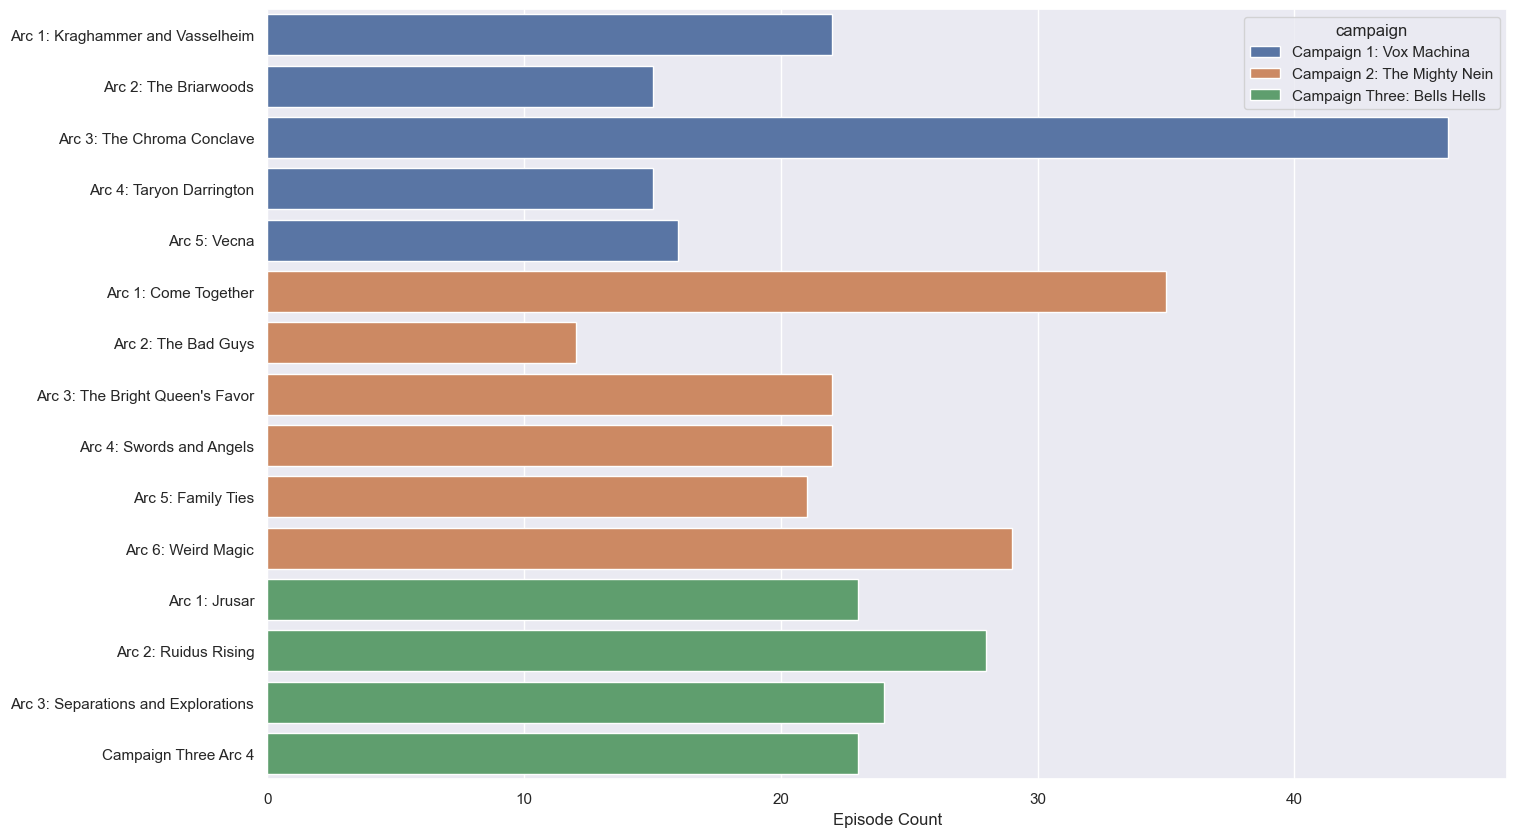

In [83]:
ax = sns.barplot(
    data = campaign_arcs,
    y    = 'arc',
    x    = 'episode_count',
    hue  = 'campaign',
    orient = 'h'
)
ax.set(xlabel = 'Episode Count', ylabel = '')
plt.show()

Here we clearly see that The Chroma Conclave is the longest arc. Also, it seems like they have gotten more consistent in breaking up their arcs into a length of 20-30 episodes.

## Episode Transcripts

First, let's get all the transcript data.

In [96]:
transcripts = CollectTranscripts(
    campaign_db,
    relative_data_dir,
    {'campaign_no': 'campaign_no', 'arc_no': 'arc_no', 'episode_no': 'episode_no',
     'campaign': 'campaign', 'arc': 'arc', 'episode': 'episode'}
)

transcripts = transcripts.loc[transcripts['section'].isin(['Part I', 'Part II']), :].reset_index()
transcripts

,index,campaign_no,arc_no,episode_no,campaign,arc,episode,section_no,line_no,section,speaker,line,linelength,nwords
0,55,1,1,1,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,2,1,Part I,MATT,All right! Let's jump on in. Thank you. Last w...,1793,320
1,56,1,1,1,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,2,2,Part I,TRAVIS,Son of a bitch.,15,4
2,57,1,1,1,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,2,3,Part I,MATT,"Yep, the barbarian for his first and only time...",215,41
3,58,1,1,1,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,2,4,Part I,TRAVIS,Next time he dies.,18,4
4,59,1,1,1,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,2,5,Part I,MATT,Yeah. Essentially. Which managed to not turn i...,213,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051901,1104402,3,4,23,Campaign Three: Bells Hells,Campaign Three Arc 4,The_Nox_Engine,4,1163,Part II,MATT,He reaches over to the cracked central dome an...,841,152
1051902,1104403,3,4,23,Campaign Three: Bells Hells,Campaign Three Arc 4,The_Nox_Engine,4,1164,Part II,MATT,[cheering\n[laughter] \n,22,2
1051903,1104404,3,4,23,Campaign Three: Bells Hells,Campaign Three Arc 4,The_Nox_Engine,4,1165,Part II,BRENNAN,Light. [cheering] [clapping] In a space beyond...,957,169
1051904,1104405,3,4,23,Campaign Three: Bells Hells,Campaign Three Arc 4,The_Nox_Engine,4,1166,Part II,MATT,That's it. Thank you all so very much for join...,312,53


We have a total of over a million lines of dialogue. Let's look at number of lines per episode to see if it has changed over time.

In [148]:
per_episode_summary = transcripts \
    .groupby(['campaign_no', 'campaign', 'arc_no', 'episode_no']) \
    .agg({'line': 'count', 'nwords': 'sum'}) \
    .reset_index() \
    .rename(columns = {'line': 'lines'})
per_episode_summary['unique_id'] = per_episode_summary['campaign_no'].astype(str) + \
    '-' + per_episode_summary['arc_no'].astype(str) + \
    '-' + per_episode_summary['episode_no'].apply('{:02d}'.format)

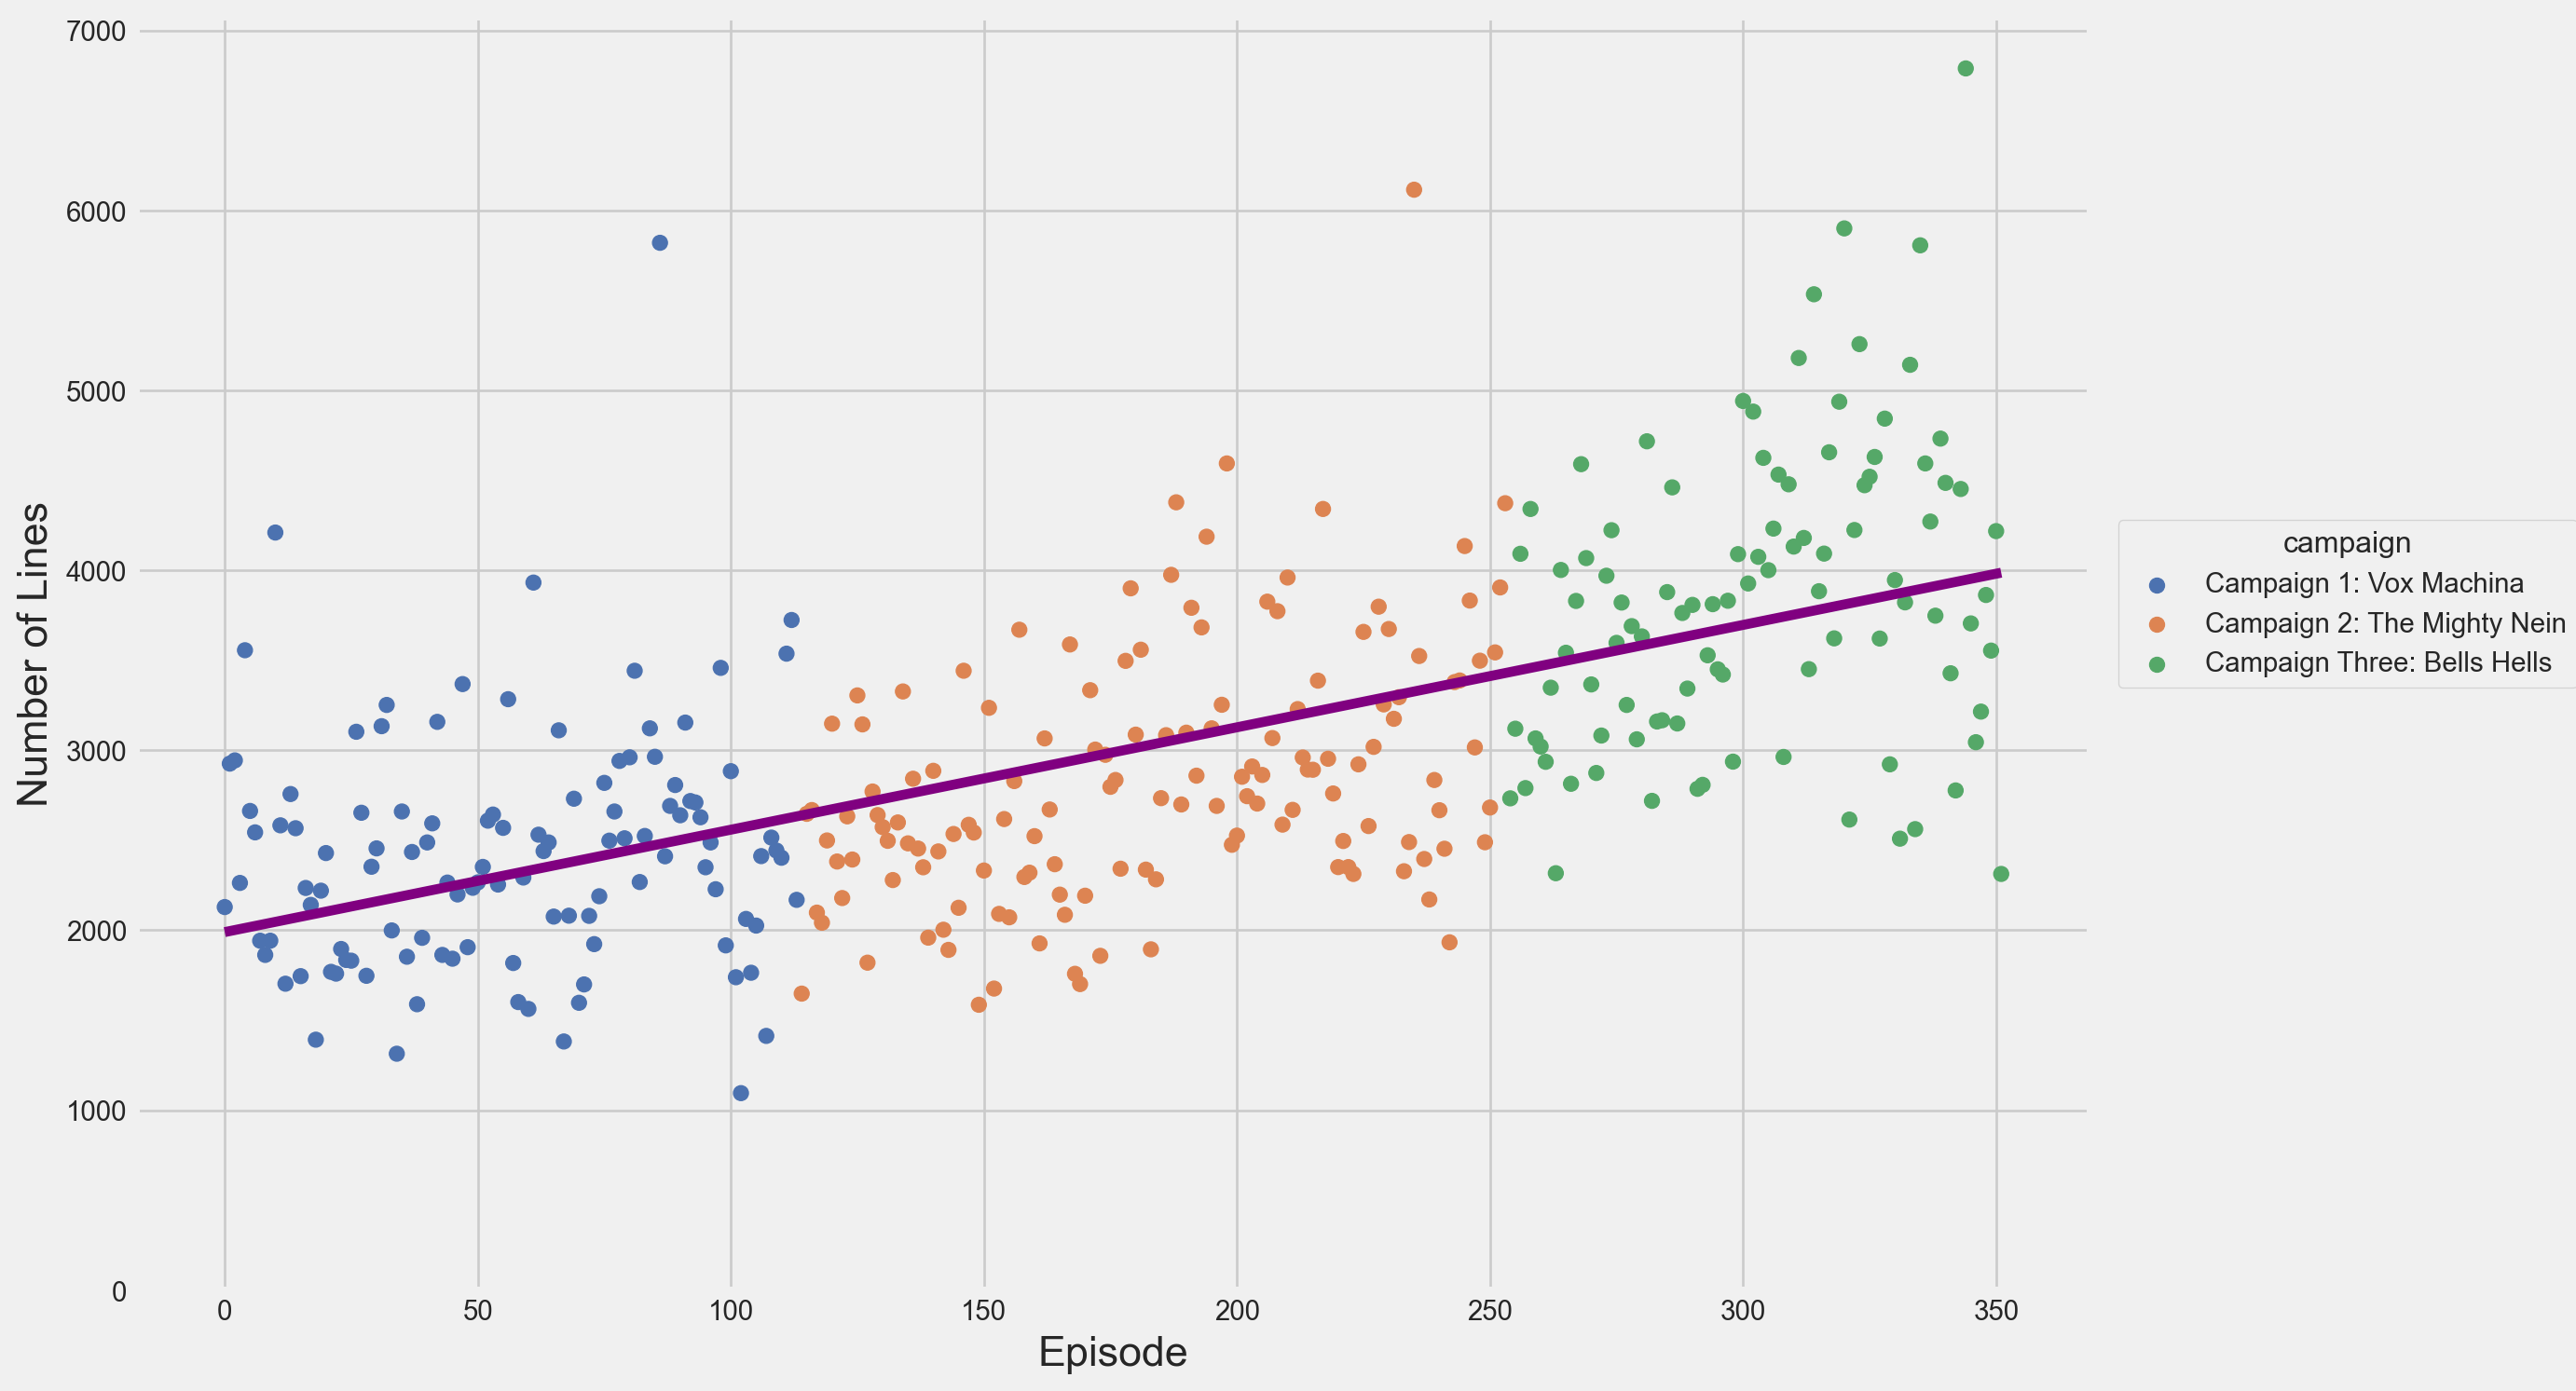

In [160]:
so.Plot(
    data  = per_episode_summary,
    x     = per_episode_summary.index,
    y     = 'lines',
) \
    .add(so.Dot(), color = 'campaign') \
    .add(so.Line(color = 'purple'), so.PolyFit(1)) \
    .limit(y = (0, None)) \
    .theme(style.library["fivethirtyeight"]) \
    .label(x = 'Episode', y = 'Number of Lines') \
    .scale(color = sns.color_palette()[0:3]) \
    .layout(size = (12, 8))

It seems that the average number of lines per episode has just about doubled from when the show started until now. There are a few episodes that stand out as having a lot more lines than the episodes around them. Let's take a look at them.

In [140]:
pd.merge(
    all_episodes,
    per_episode_summary.loc[per_episode_lines['lines'] > 5500, :],
    on = ['campaign_no', 'arc_no', 'episode_no']
)

,campaign_no,campaign,arc_no,arc,episode_no,episode,lines,nwords,unique_id
0,1,Campaign 1: Vox Machina,4,Arc 4: Taryon Darrington,4,Tangled Depths,5820,46956,1-4-04
1,2,Campaign 2: The Mighty Nein,6,Arc 6: Weird Magic,11,Fair-weather Faith,6115,46607,2-6-11
2,3,Campaign Three: Bells Hells,3,Arc 3: Separations and Explorations,10,Crisis of Faith,5534,43647,3-3-10
3,3,Campaign Three: Bells Hells,3,Arc 3: Separations and Explorations,16,Bloody Flowers,5900,43345,3-3-16
4,3,Campaign Three: Bells Hells,4,Campaign Three Arc 4,7,Rush for the Bloody Bridge,5806,43111,3-4-07
5,3,Campaign Three: Bells Hells,4,Campaign Three Arc 4,16,True Heroism,6789,44841,3-4-16


Campaign 1, arc 4, episode 4 - Tangled Depths - is the episode where Vox Machina go to the Elemental Plane of Water and fight a Kraken and clocks in at 5 and a half hours.

In campaign 2, arc 6, episode 11 - Fair-weather Faith - The Mighty Nein are on their way to Aeor when they encounter and fight Gelidon, an ancient white dragon. This episode also clocks in at nearly 5 and a half hours.

The longest episode of campaign 3, arc 4, episode 16 - True Heroism - is Bell's Hells final fight with Otohan. It clocks in at under 5 hours.

I am noticing that the number of words is similar across these episodes, so it might be interesting to see how the number of words changes over time.

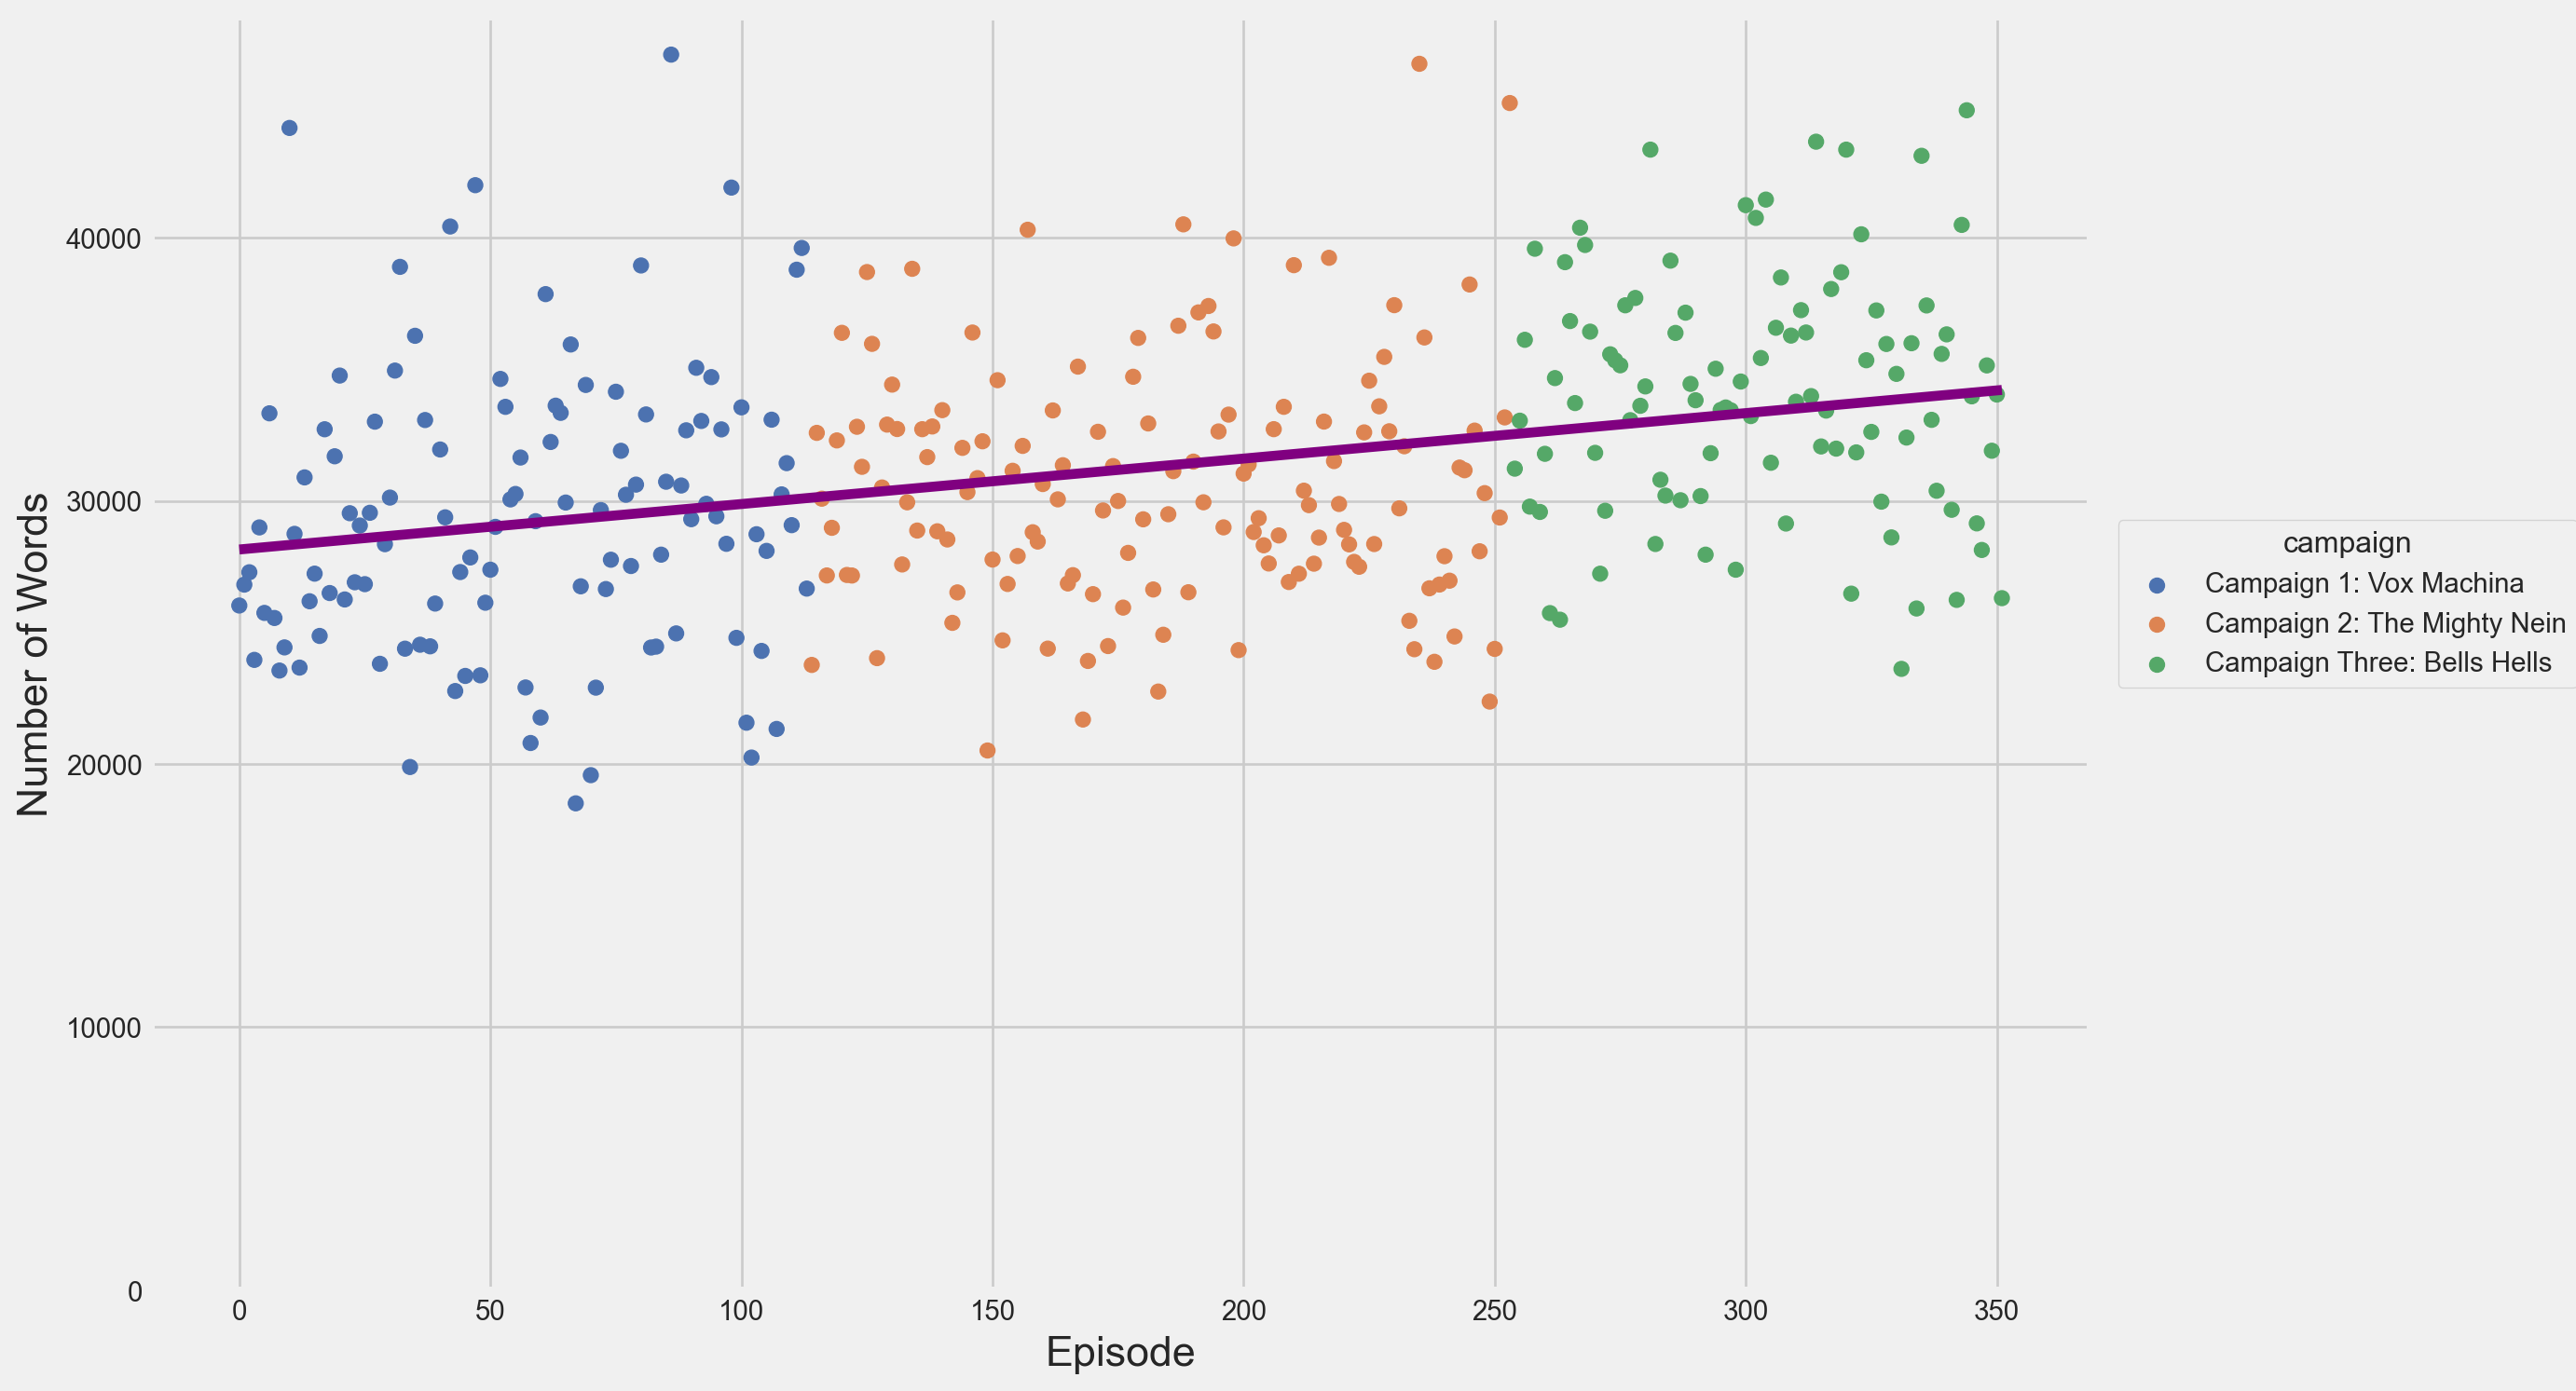

In [163]:
so.Plot(
    data  = per_episode_summary,
    x     = per_episode_summary.index,
    y     = 'nwords',
) \
    .add(so.Dot(), color = 'campaign') \
    .add(so.Line(color = 'purple'), so.PolyFit(1)) \
    .limit(y = (0, None)) \
    .theme(style.library["fivethirtyeight"]) \
    .label(x = 'Episode', y = 'Number of Words') \
    .scale(color = sns.color_palette()[0:3]) \
    .layout(size = (12, 8))

The number of words does increase but doesn't go up nearly as much as the number of lines, so it must be that the cast is getting more dynamic, or comfortable interrupting, or maybe something else. 